In [1]:
import pandas as pd 

df = pd.read_csv("cleaned_ebay_deals.csv")
df.describe()

,Price,Original Price,discount_percentage
count,510.000000,517.000000,510.000000
mean,419.642392,755.764449,39.903218
std,528.154132,970.121567,22.459604
min,3.490000,3.490000,0.000000
25%,99.950000,179.990000,25.487323
50%,195.000000,369.990000,44.454323
75%,399.990000,799.000000,58.361702
max,2399.000000,4199.950000,87.249240


C:\Users\USER\AppData\Local\Temp\ipykernel_17848\239994023.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  deals_per_hour = df.resample('H').size()


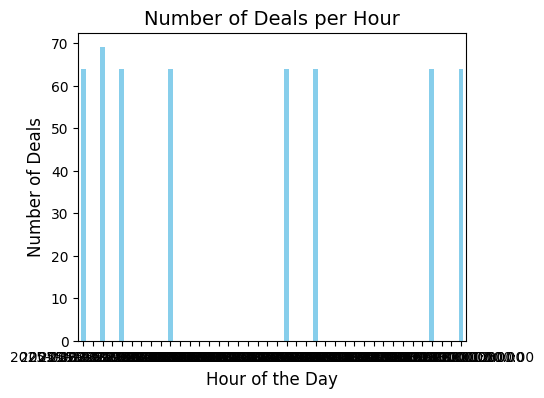

In [2]:
#Time Series Analysis
import matplotlib.pyplot as plt

# Convert the timestamp column to datetime format and sort the data
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

# Extract the hour from each timestamp and group the data by hour. 
df.set_index('Timestamp', inplace=True)
deals_per_hour = df.resample('H').size()

# Plot the bar chart for deals per hour
plt.figure(figsize=(5, 4))
deals_per_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Deals per Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Deals', fontsize=12)
plt.xticks(rotation=0)
plt.show()


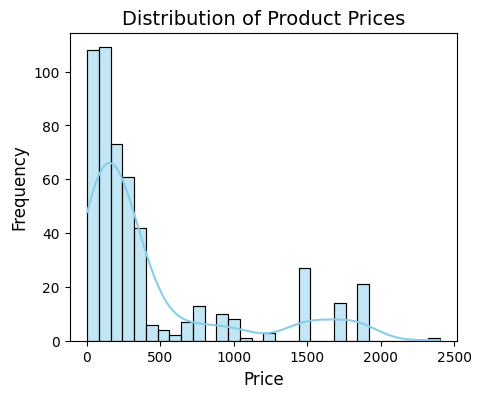

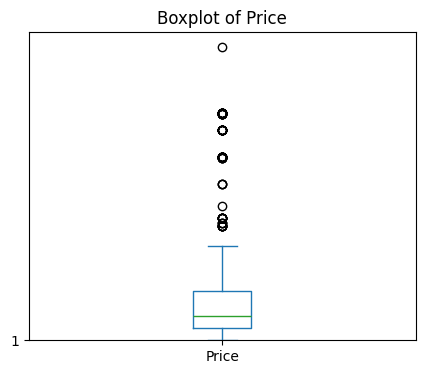

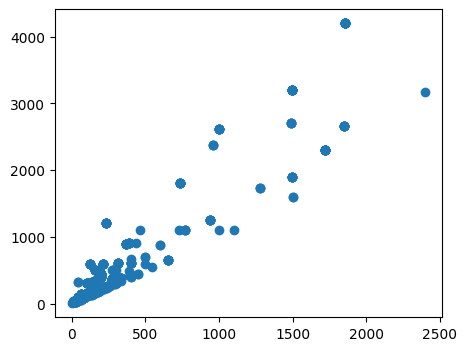

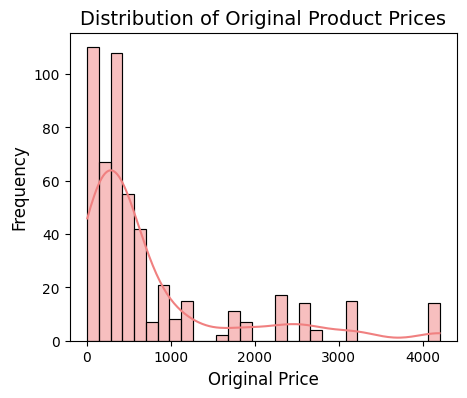

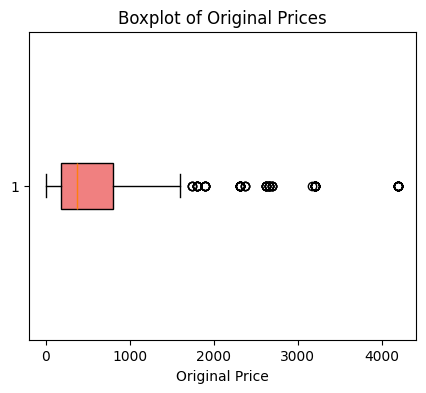

In [3]:
#Price and Discount Analysis:
import seaborn as sns

%matplotlib inline

# Histogram for product prices
plt.figure(figsize=(5, 4))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Product Prices', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Boxplot for product prices
plt.boxplot(df['Price'], vert=False)
df['Price'].plot(kind='box', vert=True, figsize=(5,4))
plt.title("Boxplot of Price")
# plt.xlabel("Price")
plt.show()

# scatter plot comparing original price versus price
x = df['Price']
y = df['Original Price']
plt.figure(figsize=(5,4))
plt.scatter(x, y)
plt.show()

# Histogram for original product prices
plt.figure(figsize=(5, 4))
sns.histplot(df['Original Price'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Original Product Prices', fontsize=14)
plt.xlabel('Original Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Boxplot for original product prices
plt.figure(figsize=(5, 4))
plt.boxplot(df['Original Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title("Boxplot of Original Prices")
plt.xlabel("Original Price")
plt.show()


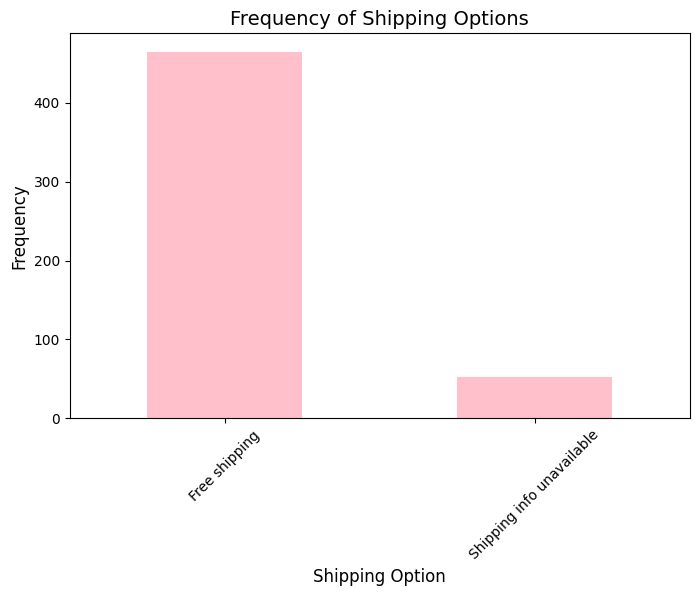

In [4]:
# Shipping Information Analysis:

# Count the frequency of different shipping options.
shipping_counts = df['Shipping'].value_counts()

# Plot a bar chart showing the frequency of shipping options.
plt.figure(figsize=(8, 5))
shipping_counts.plot(kind='bar', color='pink')
plt.title('Frequency of Shipping Options', fontsize=14)
plt.xlabel('Shipping Option', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()


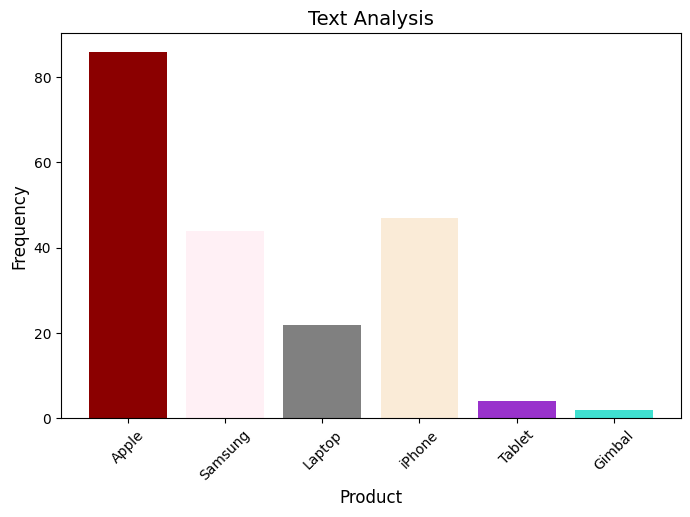

In [5]:
# Text Analysis on Product Titles
from matplotlib import colors as mcolors
import random

keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]

# Count occurrences of each keyword
count = []
for word in keywords:
    c = df['Title'].str.lower().str.contains(word.lower(), na=False).sum()
    count.append(c)

# Visualize the keyword frequencies using a bar chart
# colors = ['lightcoral', 'midnightblue', 'aquamarine', 'gold', 'deeppink', 'lightgreen']

all_colors = list(mcolors.CSS4_COLORS.keys())
bar_colors = random.sample(all_colors, len(keywords))

plt.figure(figsize=(8, 5))
plt.bar(keywords, count, color=bar_colors)
plt.title('Text Analysis', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()


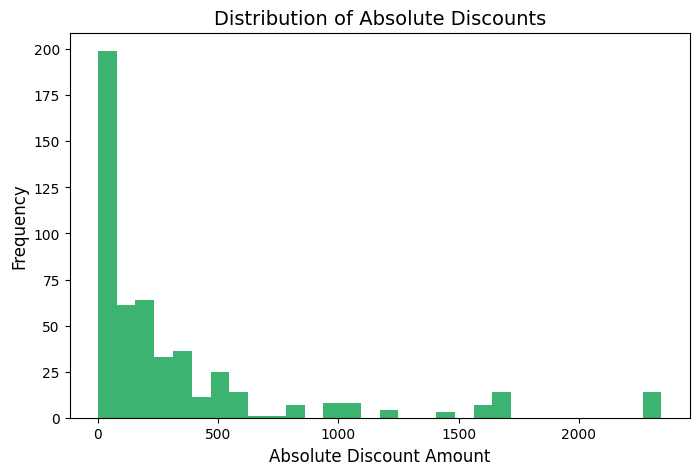

In [6]:
#  Price Difference Analysis

df['Absolute Discount'] = df['Original Price'] - df['Price']

# Plot a histogram of the price differences.
plt.figure(figsize=(8, 5))
plt.hist(df['Absolute Discount'], bins=30, color='mediumseagreen')
plt.title('Distribution of Absolute Discounts', fontsize=14)
plt.xlabel('Absolute Discount Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [8]:
# Sort the dataset by 'Discount Percentage' in descending order
df.sort_values(by='discount_percentage', ascending=False).head(5)

,Title,Price,Original Price,Shipping,Item Url,discount_percentage,Absolute Discount
Timestamp,,,,,,,
2025-03-20 01:17:54,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.00,Free shipping,https://www.ebay.com/itm/387587045897?_trkparm...,87.24924,287.05
2025-03-20 06:23:49,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.00,Free shipping,https://www.ebay.com/itm/387587045897?_trkparm...,87.24924,287.05
2025-03-20 18:23:54,Samsung Galaxy S22+ 5G SM-S906U1 128GB 256GB U...,234.95,1199.99,Free shipping,https://www.ebay.com/itm/204769428202?_trkparm...,80.42067,965.04
2025-03-21 12:33:02,Samsung Galaxy S22+ 5G SM-S906U1 128GB 256GB U...,234.95,1199.99,Free shipping,https://www.ebay.com/itm/204769428202?_trkparm...,80.42067,965.04
2025-03-20 18:23:50,Samsung Galaxy S22+ 5G SM-S906U1 128GB 256GB U...,234.95,1199.99,Free shipping,https://www.ebay.com/itm/204769428202?_trkparm...,80.42067,965.04
